# DATA WRANGLING PROJECT 

# INTRODUCTION

Real world data rarely comes clean. Using Python and its libraries, data  was gathered from a variety of sources and in a variety of formats. The datasets that were gathered were assessed and cleaned up using various libaries. This process of gathering, assessing and cleaning data is called data wrangling. The data wrangling process was well documented, after the data wrangling process, analyses and visualizations of the data was carried out.

The dataset that was wrangled, analyzed and visualized were the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

The twitter archive of WeRateDogs was downloaded and made readily available for use downloaded. This archive contained basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017.

# STEP 1 - GATHERING THE DATA

Data from three various sources were used in this project and they include:
-The WeRateDogs Twitter archive
-The tweet image predictions
-Twitter API

The WeRateDogs Twitter archive
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which was used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, 2356 of them were filtered for tweets with ratings only.

The tweet image predictions
This file (image_predictions.tsv) is present in each tweet according to a neural network. It is hosted on Udacity's servers and was downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

Twitter API
Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data was gathered from Twitter's API. Due to the fact that i had access to data for the 3000 most recent tweets. I was able to gather the data for all 5000+ by querying Twitter's API.
I gathered each tweet's retweet count and favorite ("like") count at the minimum and other additional data. I used the tweet IDs in the WeRateDogs Twitter archive and queried the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called tweet_json.txt file.

Each tweet's JSON data was written to its own line and read to the .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

Importing various libraries needed for the project

In [1]:
import pandas as pd
import numpy as np
import requests
! pip install tweepy
import json
import time
import datetime

     |████████████████████████████████| 69 kB 3.3 MB/s             
     |████████████████████████████████| 151 kB 10.7 MB/s            
  Attempting uninstall: oauthlib
    Found existing installation: oauthlib 3.1.1
    Uninstalling oauthlib-3.1.1:
      Successfully uninstalled oauthlib-3.1.1


Importing the twitter archive enchanced csv file and previewing it

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Data was gotten programmatically from the URL using requests library and previewed

In [3]:
tsv_link = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
     file.write(tsv_link.content)
images = pd.read_csv('image-predictions.tsv', sep ='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Data was gotten from the Twitter API by making use of the tweepy library

In [4]:
import tweepy
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

Tweet id from twitter-archive-enhanced.csv that was used to generate the data from the Twitter API

In [5]:
df.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2356, dtype: int64

In [6]:
list(df.tweet_id)

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [7]:
# Using one tweet ID as an example to get the status of one tweet ID
eg_id = api.get_status(892420643555336193, tweet_mode='extended')
print(eg_id)

Status(_api=<tweepy.api.API object at 0x7f4e5057aa20>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 540,

In [8]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [9]:
# Code to Query Twitter's API for additional data to be used and after gathering the data it would be written into json format
index=0

# Creating a dictionary to for errors that might occur during the gathering of the data 
dict_err = {}

start = time.time()

# Code to save each tweet into json as a new line into a txt file 
with open ('tweet_json.txt', 'w') as tweet_bk: 
    for tweet_id in tweet_ids:
                index += 1

                try:
                    # code for getting the status data for each of the tweet IDs 
                    tweet = api.get_status(tweet_id, tweet_mode = 'extended') 
                    print(str(index) + ": " + "ID - " + str(tweet_id)) 
                    # Converting each tweet status to JSON string and saving it in the tweet bk file
                    json.dump(tweet._json, tweet_bk) 
                    # code incase there is a break of text
                    tweet_bk.write("\n")

                # Code for errors that might occur during the process of gathering the data 
                except tweepy. TweepyException as error: 
                   print(str(index) + ": " "ID - " + str(tweet_id) + " has an error:", error.response.text) 
                   # Appending the errors found duting the gathering to the dictionary created earlier (dict_err)
                   dict_err[tweet_id] = error

end = time.time()

print(end - start)

1: ID - 892420643555336193
2: ID - 892177421306343426
3: ID - 891815181378084864
4: ID - 891689557279858688
5: ID - 891327558926688256
6: ID - 891087950875897856
7: ID - 890971913173991426
8: ID - 890729181411237888
9: ID - 890609185150312448
10: ID - 890240255349198849
11: ID - 890006608113172480
12: ID - 889880896479866881
13: ID - 889665388333682689
14: ID - 889638837579907072
15: ID - 889531135344209921
16: ID - 889278841981685760
17: ID - 888917238123831296
18: ID - 888804989199671297
19: ID - 888554962724278272
20: ID - 888202515573088257 has an error: {"errors":[{"code":144,"message":"No status found with that ID."}]}
21: ID - 888078434458587136
22: ID - 887705289381826560
23: ID - 887517139158093824
24: ID - 887473957103951883
25: ID - 887343217045368832
26: ID - 887101392804085760
27: ID - 886983233522544640
28: ID - 886736880519319552
29: ID - 886680336477933568
30: ID - 886366144734445568
31: ID - 886267009285017600
32: ID - 886258384151887873
33: ID - 886054160059072513
34:

KeyboardInterrupt: 

In [10]:
# Code for extracting the missing columns from the enhanced twitter archive which was imported earlier

# Creating an empty list to convert to DataFrame

tweet_list = []

with open ('tweet_json.txt', 'r') as json_file:

    for line in json_file.readlines():

#Each json string is read into a dictionary   
        each_tweet_line = json.loads(line) 
#defining the parameters 
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count'] 
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        tweet_list.append({'id': tweet_id,
                        'retweet_count': retwt_count,
                        'favorite_count': fav_count,
                        'followers_count': follows_count,
                        'friends_count': frnds_count})

tweet_json = pd.DataFrame(tweet_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [11]:
tweet_json

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,7009,33809,9285536,21
1,892177421306343426,5301,29332,9285536,21
2,891815181378084864,3481,22052,9285536,21
3,891689557279858688,7225,36937,9285536,21
4,891327558926688256,7760,35311,9285536,21
...,...,...,...,...,...
158,860177593139703809,26766,0,9285536,21
159,859924526012018688,3584,17648,9285536,21
160,859851578198683649,3070,13975,9286001,21
161,859607811541651456,1365,16843,9285536,21


# Step 2 - Assessing Data

After gathering all three pieces of data, I assessed them visually and programmatically for quality and tidiness issues and detected some quality and tidiness issues.
Visual assessment: each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes. Once displayed, data can additionally be assessed in an external application (e.g. Excel, text editor).
Programmatic assessment: pandas' functions and/or methods are used to assess the data.

In [12]:
#a view of the dataset to carry out visual assesment
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


description of the columns in the df dataframe:
tweet_id: the unique identifier for each tweet

in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

timestamp: time when this Tweet was created

source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

text: actual UTF-8 text of the status update

retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

retweeted_status_timestamp: time of retweet

expanded_urls: tweet URL

rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10

rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

name: name of the dog

doggo: one of the 4 dog "stage"

floofer: one of the 4 dog "stage"

pupper: one of the 4 dog "stage"

puppo: one of the 4 dog

In [13]:
#getting information about the dataset for assesment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#statistical information about the datasets
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df.shape

(2356, 17)

In [16]:
#number of unique values in the datasets for each column
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [17]:
#a view of the dataset to carry out visual assesment
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


image_prediction columns description:
tweet_id: the unique identifier for each tweet

jpg_url: dog's image URL

img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

p1: algorithm's #1 prediction for the image in the tweet

p1_conf: how confident the algorithm is in its #1 prediction

p1_dog: whether or not the #1 prediction is a breed of dog

p2: algorithm's #2 prediction for the image in the tweet

p2_conf: how confident the algorithm is in its #2 prediction

p2_dog: whether or not the #2 prediction is a breed of dog

p3: algorithm's #3 prediction for the image in the tweet

p3_conf: how confident the algorithm is in its #3 prediction

p3_dog: whether or not the #3 prediction is a breed of dog

In [18]:
#getting information about the dataset for assesment
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#statistical information about the datasets
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
images.shape

(2075, 12)

In [21]:
#number of unique values in the datasets for each column
images.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [22]:
#a view of the dataset to carry out visual assesment
tweet_json

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,7009,33809,9285536,21
1,892177421306343426,5301,29332,9285536,21
2,891815181378084864,3481,22052,9285536,21
3,891689557279858688,7225,36937,9285536,21
4,891327558926688256,7760,35311,9285536,21
...,...,...,...,...,...
158,860177593139703809,26766,0,9285536,21
159,859924526012018688,3584,17648,9285536,21
160,859851578198683649,3070,13975,9286001,21
161,859607811541651456,1365,16843,9285536,21


tweet_json columns description
id: the unique identifier for each tweet

retweet_count: the number of times the original tweet was retweeted

favorite_count: the number of times the the original tweet was loved or liked

followers_count: the number of followers of WeRataeDogs account as at the time of the each tweet

friends_count: the number of profiles WeRateDogs account was following at the time of each tweet

In [23]:
#getting information about the dataset for assesment
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               163 non-null    int64
 1   retweet_count    163 non-null    int64
 2   favorite_count   163 non-null    int64
 3   followers_count  163 non-null    int64
 4   friends_count    163 non-null    int64
dtypes: int64(5)
memory usage: 6.5 KB


In [24]:
#statistical information about the datasets
tweet_json.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,1.630000e+02,163.000000,163.000000,1.630000e+02,163.0
mean,8.760583e+17,5538.613497,23135.472393,9.285539e+06,21.0
std,9.570019e+15,5472.575980,17398.169740,3.642161e+01,0.0
min,8.591970e+17,3.000000,0.000000,9.285536e+06,21.0
25%,8.682264e+17,2910.000000,15195.500000,9.285536e+06,21.0
50%,8.768381e+17,3956.000000,21050.000000,9.285536e+06,21.0
75%,8.843448e+17,6013.000000,27006.500000,9.285536e+06,21.0
max,8.924206e+17,37456.000000,108909.000000,9.286001e+06,21.0


In [25]:
tweet_json.shape

(163, 5)

In [26]:
#number of unique values in the datasets for each column
tweet_json.nunique()

id                 163
retweet_count      156
favorite_count     146
followers_count      2
friends_count        1
dtype: int64

Quality issues 

Quality data issues of df dataframe

-in_reply_to_status_id , in_reply_to_user_id, expanded_urls,  not needed for analysis

-retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be dropped if it contains a value due because it means it is not an original tweet

-tweet id should be in string not int

-timestamp column is in the wrong format

-missing values in columns like expanded_urls, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, 
in_reply_to_status_id and in_reply_to_user_id

Tidy data issues of df dataframe

-doggo, floofer, pupper, puppo columns are stages of a dog and should be in just one column instead of being separated

Quality data issues of image dataframe

-in p1, p2, p3 columns, presence of '_' in between the names

-in p1, p2, p3 columns capital and small letters starting the names

Quality data issues in tweet_json dataframe

-followers count and friends count not needed for analysis due to small number of unique values

Tidy data issues in tweet_json dataframe

-different column name for the tweet id in tweet_json dataset 

Tidy data issue 

-all the different datasets should be joined together for proper analysis


In [27]:
#name changed so typing would be easier
tj = tweet_json

# Step 3 - Cleaning Data

In [28]:
#creating a copy of each dataset before cleaning
df_copy = df.copy()
images_copy = images.copy()
tj_copy = tj.copy()

Issue - in_reply_to_status_id , in_reply_to_user_id, expanded_urls,  not needed for analysis

Define - remove in_reply_to_status_id , in_reply_to_user_id, expanded_urls

In [29]:
not_needed = ['in_reply_to_status_id', 'in_reply_to_user_id', 'expanded_urls']
df_copy.drop(not_needed, axis=1, inplace=True)

Test to see if code worked

In [30]:
df_copy

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,7,10,a,None,None,None,None


Issue - retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be dropped if it contains a value due because it means it is not an original tweet

Define - remove rows that have values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

In [31]:
df_copy = df_copy[df_copy.retweeted_status_id.isnull()]
df_copy = df_copy[df_copy.retweeted_status_user_id.isnull()]
df_copy = df_copy[df_copy.retweeted_status_timestamp.isnull()]

Test to see if code worked

In [32]:
print(df_copy.retweeted_status_id.notnull().sum())
print(df_copy.retweeted_status_user_id.notnull().sum())
print(df_copy.retweeted_status_timestamp.notnull().sum())

0
0
0


Issue - tweet id should be in string not int in the 3 datasets

Define - convert tweet id to string

In [33]:
df_copy['tweet_id'] = df_copy['tweet_id'].astype(str)
images_copy['tweet_id'] = images_copy['tweet_id'].astype(str)
tj_copy['id'] = tj_copy['id'].astype(str)

Test to see if code worked

In [34]:
df_copy.dtypes

tweet_id                       object
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [35]:
images_copy.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [36]:
tj_copy.dtypes

id                 object
retweet_count       int64
favorite_count      int64
followers_count     int64
friends_count       int64
dtype: object

Issue - timestamp column is in the wrong format

Define - covert the timestamp column into timestamp format

In [37]:
df_copy['timestamp'] = pd.to_datetime(df_copy['timestamp'])

Test to see if code worked

In [38]:
df_copy.dtypes

tweet_id                                   object
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object

Issue - doggo, floofer, pupper, puppo columns are stages of a dog and should be in just one column instead of being separated

Define - add them together in a column

In [39]:
df_copy['stage'] = df_copy.doggo + df_copy.floofer + df_copy.pupper + df_copy.puppo

Test to see if code worked

In [40]:
df_copy.stage.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [41]:
#code to remove the  none from the name of the stages and correctly get the names of the stages
df_copy.loc[df_copy.stage == 'NoneNoneNoneNone', 'stage'] = 'none'
df_copy.loc[df_copy.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
df_copy.loc[df_copy.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo' 
df_copy.loc[df_copy.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
df_copy.loc[df_copy.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
df_copy.loc[df_copy.stage == 'doggoNonepupperNone', 'stage'] = 'doggo,pupper' 
df_copy.loc[df_copy.stage == 'doggoflooferNoneNone', 'stage'] = 'doggo, floofer'
df_copy.loc[df_copy.stage == 'doggoNoneNonepuppo', 'stage'] = 'doggo,puppo'

In [42]:
df_copy.stage.value_counts()

none              1831
pupper             224
doggo               75
puppo               24
doggo,pupper        10
floofer              9
doggo,puppo          1
doggo, floofer       1
Name: stage, dtype: int64

In [43]:
#dropping the former columns
former_columns = ['doggo', 'floofer', 'pupper', 'puppo']
df_copy.drop(former_columns, axis=1, inplace=True)
df_copy

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,none
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,none
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,none
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,none
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,none
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,5,10,None,none
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,6,10,a,none
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,9,10,a,none
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,7,10,a,none


Issues - in p1, p2, p3 columns, presence of '_' in between the names

Define - replace '_' with space

In [44]:
images_copy['p1'] = images_copy['p1'].str.replace('_',' ')

In [45]:
images_copy['p1']

0       Welsh springer spaniel
1                      redbone
2              German shepherd
3          Rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071               paper towel
2072                 Chihuahua
2073                 Chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [46]:
images_copy['p2'] = images_copy['p2'].str.replace('_',' ')
images_copy['p2']

0                   collie
1       miniature pinscher
2                 malinois
3                  redbone
4               Rottweiler
               ...        
2070      English springer
2071    Labrador retriever
2072              malamute
2073              Pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object

In [47]:
images_copy['p3'] = images_copy['p3'].str.replace('_',' ')
images_copy['p3']

0                 Shetland sheepdog
1               Rhodesian ridgeback
2                        bloodhound
3                miniature pinscher
4                          Doberman
                   ...             
2070    German short-haired pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object

Issues - in p1, p2, p3 columns capital and small letters starting the names

Define - change all to rows starting with capital letters to start with small letters so it can be uniform

In [48]:
images_copy['p1'].str.lower()

0       welsh springer spaniel
1                      redbone
2              german shepherd
3          rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071               paper towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [49]:
images_copy['p2'].str.lower()

0                   collie
1       miniature pinscher
2                 malinois
3                  redbone
4               rottweiler
               ...        
2070      english springer
2071    labrador retriever
2072              malamute
2073              pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object

In [50]:
images_copy['p3'].str.lower()

0                 shetland sheepdog
1               rhodesian ridgeback
2                        bloodhound
3                miniature pinscher
4                          doberman
                   ...             
2070    german short-haired pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object

Issues - followers count and friends count not needed for analysis

Define - drop followers count and friends count columns

In [51]:
irrelevant = ['followers_count', 'friends_count']
tj_copy.drop(irrelevant, axis=1, inplace=True)

Test to see if code worked

In [52]:
tj_copy

,id,retweet_count,favorite_count
0,892420643555336193,7009,33809
1,892177421306343426,5301,29332
2,891815181378084864,3481,22052
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311
...,...,...,...
158,860177593139703809,26766,0
159,859924526012018688,3584,17648
160,859851578198683649,3070,13975
161,859607811541651456,1365,16843


Issues - different column name for the tweet id in tweet_json dataset

Define - change the column name id to tweet_id

In [53]:
tj_copy.rename(columns = {'id':'tweet_id'}, inplace = True)

Test to see if the code worked

In [54]:
tj_copy

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7009,33809
1,892177421306343426,5301,29332
2,891815181378084864,3481,22052
3,891689557279858688,7225,36937
4,891327558926688256,7760,35311
...,...,...,...
158,860177593139703809,26766,0
159,859924526012018688,3584,17648
160,859851578198683649,3070,13975
161,859607811541651456,1365,16843


Issues - all the different datasets should be joined together for proper analysis

Define - merge all datasets 

In [55]:
dataset = df_copy.merge(images_copy,on='tweet_id').merge(tj_copy,on='tweet_id')

Test to see if code worked

In [56]:
dataset

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7009,33809
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29332
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3481,22052
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,7225,36937
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,7760,35311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,860184849394610176,2017-05-04 17:30:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,NaN,NaN,NaN,14,10,None,...,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False,5127,15023
131,859924526012018688,2017-05-04 00:15:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,12,10,Milky,...,0.254587,True,Staffordshire bullterrier,0.192558,True,hog,0.100270,False,3584,17648
132,859851578198683649,2017-05-03 19:26:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper. He picks pup recyclables that ha...,NaN,NaN,NaN,13,10,Trooper,...,0.899086,True,golden retriever,0.047091,True,kuvasz,0.023206,True,3070,13975
133,859607811541651456,2017-05-03 03:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,13,10,None,...,0.895529,True,Irish setter,0.024099,True,Labrador retriever,0.019285,True,1365,16843


# Step 4 - Storing Data

The cleaned data was stored in a CSV file and named twitter_archive_master.csv. 

In [57]:
dataset.to_csv("twitter_archive_master.csv", index=False)

Test to see if the data stored correctly

In [58]:
data = pd.read_csv("twitter_archive_master.csv")
data

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7009,33809
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5301,29332
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3481,22052
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,...,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,7225,36937
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,...,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,7760,35311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,860184849394610176,2017-05-04 17:30:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,NaN,NaN,NaN,14,10,None,...,0.267612,False,gorilla,0.104293,False,orangutan,0.059908,False,5127,15023
131,859924526012018688,2017-05-04 00:15:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,12,10,Milky,...,0.254587,True,Staffordshire bullterrier,0.192558,True,hog,0.100270,False,3584,17648
132,859851578198683649,2017-05-03 19:26:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper. He picks pup recyclables that ha...,NaN,NaN,NaN,13,10,Trooper,...,0.899086,True,golden retriever,0.047091,True,kuvasz,0.023206,True,3070,13975
133,859607811541651456,2017-05-03 03:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,13,10,None,...,0.895529,True,Irish setter,0.024099,True,Labrador retriever,0.019285,True,1365,16843


# Step 5 - Analyzing and Visualizing Data

In [59]:
#finding correlations between the variables
data.corr()

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count
tweet_id,1.000000,NaN,NaN,NaN,-0.023531,NaN,-0.117131,0.049730,0.117222,-0.054282,0.042165,-0.029135,0.042677,-0.043932,0.065691
retweeted_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweeted_status_timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_numerator,-0.023531,NaN,NaN,NaN,1.000000,NaN,0.120518,-0.096423,-0.073564,0.092033,-0.118706,0.072993,-0.092873,0.082160,0.045598
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,-0.117131,NaN,NaN,NaN,0.120518,NaN,1.000000,0.266404,0.148169,-0.162375,0.148169,-0.133336,0.166377,0.045788,0.015248
p1_conf,0.049730,NaN,NaN,NaN,-0.096423,NaN,0.266404,1.000000,0.392337,-0.565734,0.378722,-0.719058,0.442673,-0.035020,-0.000334
p1_dog,0.117222,NaN,NaN,NaN,-0.073564,NaN,0.148169,0.392337,1.000000,0.025456,0.706522,-0.065407,0.539101,-0.062513,-0.052740
p2_conf,-0.054282,NaN,NaN,NaN,0.092033,NaN,-0.162375,-0.565734,0.025456,1.000000,-0.007202,0.559659,-0.073737,-0.024406,-0.056388


In [60]:
#finding the number of unique values in the dataframe
data.nunique()

tweet_id                      135
timestamp                     135
source                          1
text                          135
retweeted_status_id             0
retweeted_status_user_id        0
retweeted_status_timestamp      0
rating_numerator                5
rating_denominator              1
name                          105
stage                           5
jpg_url                       135
img_num                         4
p1                             65
p1_conf                       135
p1_dog                          2
p2                             68
p2_conf                       135
p2_dog                          2
p3                             85
p3_conf                       135
p3_dog                          2
retweet_count                 135
favorite_count                134
dtype: int64

In [61]:
data.describe()

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.350000e+02,0.0,0.0,0.0,135.000000,135.0,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,8.764949e+17,NaN,NaN,NaN,12.637037,10.0,1.281481,0.634742,0.135923,0.057405,5718.733333,26511.444444
std,9.794448e+15,NaN,NaN,NaN,0.927261,0.0,0.653942,0.264615,0.103654,0.048692,5302.650479,16084.563686
min,8.591970e+17,NaN,NaN,NaN,5.000000,10.0,1.000000,0.097049,0.000361,0.000073,953.000000,6322.000000
25%,8.685874e+17,NaN,NaN,NaN,12.000000,10.0,1.000000,0.419463,0.047080,0.012321,3077.000000,17919.500000
50%,8.773168e+17,NaN,NaN,NaN,13.000000,10.0,1.000000,0.664181,0.116317,0.048530,3973.000000,22547.000000
75%,8.849011e+17,NaN,NaN,NaN,13.000000,10.0,1.000000,0.871336,0.193898,0.087547,6204.500000,29460.000000
max,8.924206e+17,NaN,NaN,NaN,14.000000,10.0,4.000000,0.999201,0.451038,0.193548,37456.000000,108909.000000


In [62]:
import matplotlib.pyplot as plt


# Question 1 - Does the number of time a tweet is retweeted and the number of time the tweet is liked have any relationship  with one another ?

As shown in the scatter plot below it is noticed that the higher the number of retweets a tweet gets the higher the number of times the tweet is liked.

Text(0.5, 1.0, 'Relationship between retweet_count and favorite_count')

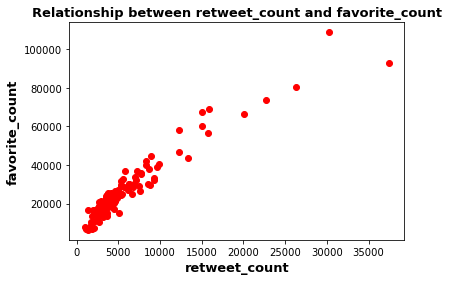

In [63]:
plt.scatter(data.retweet_count, data.favorite_count, c = 'red')
plt.xlabel('retweet_count', fontsize = 13, weight = 'bold')
plt.ylabel('favorite_count', fontsize = 13, weight = 'bold')
plt.title('Relationship between retweet_count and favorite_count', fontsize = 13, weight = 'bold')

# Question 2 - Is the distribution of the rating_numerator normal?

The distribution of the rating_numerator isn't normal, it is skewed to the left which shows that the rating_numerator is made up of majorly larger values and the smaller values are tthe minority.

Text(0.5, 1.0, 'Distribution of rating_numerator')

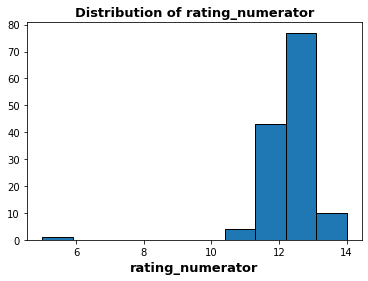

In [64]:
plt.hist(data.rating_numerator, edgecolor = 'black')
plt.xlabel('rating_numerator',  fontsize = 13, weight = 'bold')
plt.title('Distribution of rating_numerator', fontsize = 13, weight = 'bold')

# Question 3 - Which stage has the highest ratings?

The doggo and pupper stages have the highest ratings amongst the other stages

Text(0.5, 1.0, 'Ratings of each dog stage')

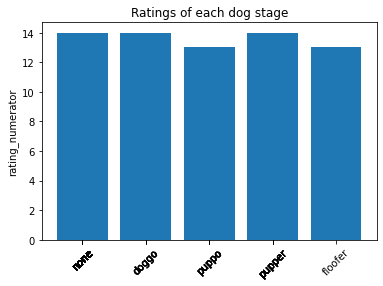

In [65]:
plt.bar(data.stage, data.rating_numerator)
plt.xticks(data.stage, rotation=45)
plt.ylabel('rating_numerator')
plt.title('Ratings of each dog stage')

# Question 4 - Which stage is the most frequent  stage according to the neural network's image prediction?

The pupper stage is the most frequent stage according to the neural network's image prediction

Text(0.5, 1.0, 'Value Count of each dog stage')

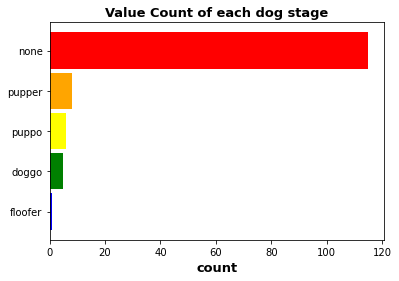

In [66]:
colors = ['red', 'orange', 'yellow', 'green', 'blue']
data.stage.value_counts().plot(kind  = 'barh', color = colors, width = 0.9)
plt.gca().invert_yaxis()
plt.xlabel('count', fontsize = 13, weight = 'bold')
plt.title('Value Count of each dog stage', fontsize = 13, weight = 'bold')

# Question 5 - Which image number occured most?

The image number 1 occured the most

Text(0.5, 1.0, 'Value Count of each img_num')

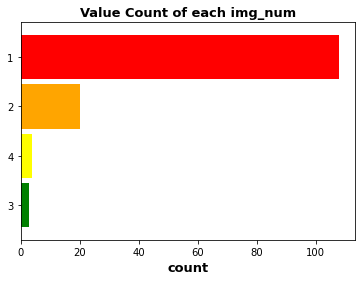

In [67]:
colors = ['red', 'orange', 'yellow', 'green']
data.img_num.value_counts().plot(kind  = 'barh', color = colors, width = 0.9)
plt.gca().invert_yaxis()
plt.xlabel('count', fontsize = 13, weight = 'bold')
plt.title('Value Count of each img_num', fontsize = 13, weight = 'bold')

Insights:

(1) pupper is most common stage.

(2) the average rating_numerator is 5.0, the min rating_numerator is 5.0, the max rating_numerator is 14.0.

(3) the retweet_count and favorite_count  have a positive correlation with one another.

(4) the doggo and pupper stages have the highest ratings amongst the other stages.